Importing Packages

In [ ]:
import numpy as np
import pandas as pd
import sklearn as sk
import matplotlib.pyplot as plt
import os
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import RANSACRegressor
from sklearn.linear_model import HuberRegressor

Importing the Dataset

In [ ]:
os.chdir('/content/drive/MyDrive/Python_Data/Exposys_Project')
print(os.getcwd())
c=pd.DataFrame(columns=['Name','RMSE','MSE','R2 Score','Max Error'])
da=pd.read_csv('50_Startups.csv')
da.describe()

/content/drive/MyDrive/Python_Data/Exposys_Project


,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


Relation between individual parameter to the profit

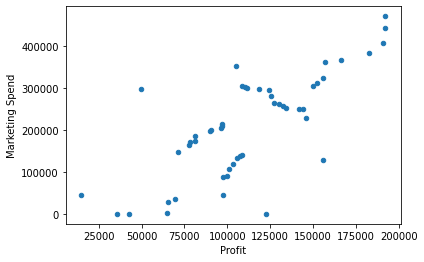

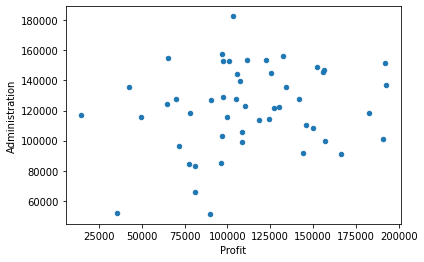

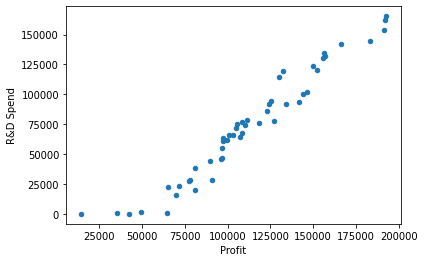

In [ ]:
da.plot.scatter(x="Profit", y="Marketing Spend")
plt.savefig('Marketing_Spend.jpg',bbox_inches='tight',orientation ='landscape')
da.plot.scatter(x="Profit", y="Administration")
plt.savefig('Administration_Spend.jpg',bbox_inches='tight',orientation ='landscape')
da.plot.scatter(x="Profit", y="R&D Spend")
plt.savefig('R&D_Spend.jpg',bbox_inches='tight',orientation ='landscape')

Splitting the dataset into test and train

In [ ]:
X=da.drop("Profit",axis=1)
Y=da['Profit']
X_Train, X_Test, Y_Train, Y_Test = train_test_split(X,Y,test_size=0.2,
                                                    random_state=20)

Fitting the train set to various models and test its usability

In [ ]:
modelKNNR = KNeighborsRegressor()
modelKNNR.fit(X_Train, Y_Train)
pred=modelKNNR.predict(X_Test)
c=c.append({'Name':'KNeighborsRegressor',
            'RMSE':round(metrics.mean_squared_error(Y_Test, pred, squared=False),2),
            'MSE':round(metrics.mean_squared_error(Y_Test, pred),2),
            'R2 Score':metrics.r2_score(Y_Test, pred),
            'Max Error':round(metrics.max_error(Y_Test, pred),2)},ignore_index = True)

In [ ]:
modelLR = LinearRegression()
modelLR.fit(X_Train, Y_Train)
pred=modelLR.predict(X_Test)
c=c.append({'Name':'LinearRegression',
            'RMSE':round(metrics.mean_squared_error(Y_Test, pred, squared=False),2),
            'MSE':round(metrics.mean_squared_error(Y_Test, pred),2),
            'R2 Score':metrics.r2_score(Y_Test, pred),
            'Max Error':round(metrics.max_error(Y_Test, pred),2)},ignore_index = True)

In [ ]:
modelR = Ridge()
modelR.fit(X_Train, Y_Train)
pred=modelR.predict(X_Test)
c=c.append({'Name':'Ridge',
            'RMSE':round(metrics.mean_squared_error(Y_Test, pred, squared=False),2),
            'MSE':round(metrics.mean_squared_error(Y_Test, pred),2),
            'R2 Score':metrics.r2_score(Y_Test, pred),
            'Max Error':round(metrics.max_error(Y_Test, pred),2)},ignore_index = True)

In [ ]:
modelL = Lasso()
modelL.fit(X_Train, Y_Train)
pred=modelL.predict(X_Test)
c=c.append({'Name':'Lasso', 
            'RMSE':round(metrics.mean_squared_error(Y_Test, pred, squared=False),2), 
            'MSE':round(metrics.mean_squared_error(Y_Test, pred),2), 
            'R2 Score':metrics.r2_score(Y_Test, pred), 
            'Max Error':round(metrics.max_error(Y_Test, pred),2)},ignore_index = True)

In [ ]:
modelEN = ElasticNet()
modelEN.fit(X_Train, Y_Train)
pred=modelEN.predict(X_Test)
c=c.append({'Name':'ElasticNet', 
            'RMSE':round(metrics.mean_squared_error(Y_Test, pred, squared=False),2), 
            'MSE':round(metrics.mean_squared_error(Y_Test, pred),2), 
            'R2 Score':metrics.r2_score(Y_Test, pred), 
            'Max Error':round(metrics.max_error(Y_Test, pred),2)},ignore_index = True)

In [ ]:
modelRANSAC = RANSACRegressor()
modelRANSAC.fit(X_Train, Y_Train)
pred=modelRANSAC.predict(X_Test)
c=c.append({'Name':'RANSACRegressor', 
            'RMSE':round(metrics.mean_squared_error(Y_Test, pred, squared=False),2), 
            'MSE':round(metrics.mean_squared_error(Y_Test, pred),2), 
            'R2 Score':metrics.r2_score(Y_Test, pred), 
            'Max Error':round(metrics.max_error(Y_Test, pred),2)},ignore_index = True)

In [ ]:
modelHR = HuberRegressor()
modelHR.fit(X_Train, Y_Train)
pred=modelHR.predict(X_Test)
c=c.append({'Name':'HuberRegressor', 
            'RMSE':round(metrics.mean_squared_error(Y_Test, pred, squared=False),2), 
            'MSE':round(metrics.mean_squared_error(Y_Test, pred),2), 
            'R2 Score':metrics.r2_score(Y_Test, pred), 
            'Max Error':round(metrics.max_error(Y_Test, pred),2)},ignore_index = True)

Comparisson of various models

In [ ]:
c

,Name,RMSE,MSE,R2 Score,Max Error
0,KNeighborsRegressor,12210.74,1.491021e+08,0.918830,21357.20
1,LinearRegression,9742.36,9.491357e+07,0.948330,19195.73
2,Ridge,9742.36,9.491357e+07,0.948330,19195.73
3,Lasso,9742.36,9.491357e+07,0.948330,19195.73
4,ElasticNet,9742.36,9.491357e+07,0.948330,19195.73
5,RANSACRegressor,9164.30,8.398432e+07,0.954280,17208.92
6,HuberRegressor,13635.49,1.859265e+08,0.898783,27011.31


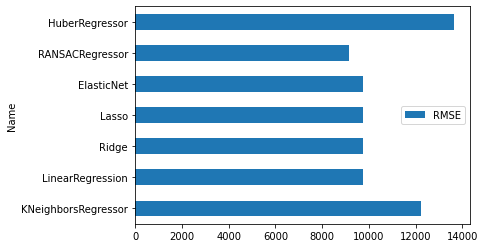

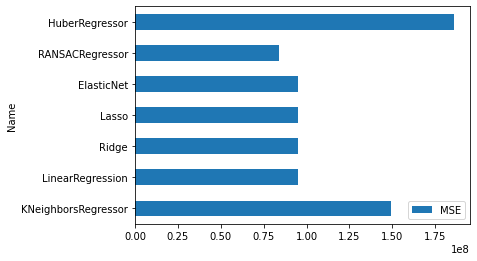

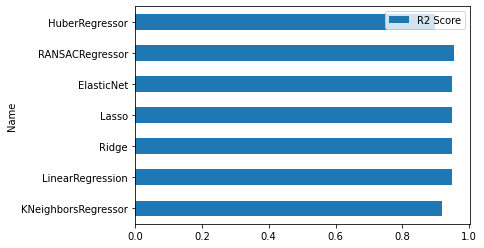

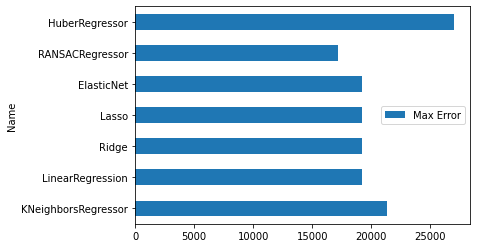

In [ ]:
c.to_csv("Comparisons.csv")
c.plot.barh(x="Name", y="RMSE")
plt.savefig('RMSE.jpg',bbox_inches='tight',orientation ='landscape')
c.plot.barh(x="Name", y="MSE")
plt.savefig('MSE.jpg',bbox_inches='tight',orientation ='landscape')
c.plot.barh(x="Name", y="R2 Score")
plt.savefig('R2_Score.jpg',bbox_inches='tight',orientation ='landscape')
c.plot.barh(x="Name", y="Max Error")
plt.savefig('Max_Error.jpg',bbox_inches='tight',orientation ='landscape')

For Realtime Use

In [ ]:
RD=float(input('Enter R&D Spend: '))
Admin=float(input('Enter Administration Spend: '))
Market=float(input('Enter Marketing Spend: '))
q=pd.DataFrame(columns=['R&D Spend', 'Administration', 'Marketing Spend'])
q=q.append({'R&D Spend':RD,
            'Administration':Admin,
            'Marketing Spend':Market},ignore_index=True)
pred=modelRANSAC.predict(q)
print('For R&D Spend:'+str(RD)+
      ' ,Administration Spend:'+str(Admin)+ 
      ' ,Marketing Spend:'+str(Market))
print("The model predicts the profit to be: "+str(round(pred[0],2)))

Enter R&D Spend: 50
Enter Administration Spend: 50
Enter Marketing Spend: 50
For R&D Spend:50.0 ,Administration Spend:50.0 ,Marketing Spend:50.0
The model predicts the profit to be: 60619.03
